In [1]:
import warnings
warnings.filterwarnings('ignore')
import datetime as dt     
dt.datetime.today().strftime("%m/%d/%Y")
import os as os
%matplotlib inline 
from IPython.display import HTML
import pandas as pd
import numpy as np
import os as os
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import YouTubeVideo 
from numpy import random as random
from IPython.display import IFrame
import qgrid
os.chdir('C:/Users/falco/Desktop/directory/Humminbird_rescue/data/')
from bokeh.io import output_notebook
from bokeh.models.formatters import DatetimeTickFormatter
from bokeh.models import FixedTicker, HoverTool
import datetime as datetime
from dateutil.relativedelta import relativedelta
from matplotlib.colors import ListedColormap
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
plt.rcParams['legend.fontsize'] = plt.rcParams['font.size']
plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']
#plt.rcParams['savefig.dpi'] = 3*plt.rcParams['savefig.dpi']
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.loc'] = 'center left'
plt.rcParams['axes.linewidth'] = 1
#sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
output_notebook()

Loading BokehJS ...

In [2]:
sim = pd.read_csv('C:/Users/falco/Desktop/directory/Humminbird_rescue/Outputs/Simulation_treatment_subset.csv')
sim.head()

,Unnamed: 0,Age_e,season,r,Heat,Fluids,Steroid,NSAID,Antibiotic,G_O,Sex_e,predicted_disposition
0,1,adult-like,Winter,unknown,1,0,0,0,0,Non-selasphorus spp.,Female-like,0.287819
1,2,adult-like,Winter,unknown,1,1,0,0,0,Non-selasphorus spp.,Female-like,0.347845
2,3,adult-like,Winter,caught by domestic animal,1,0,0,0,0,Non-selasphorus spp.,Female-like,0.250501
3,4,adult-like,Spring,window hit,1,1,0,0,0,Non-selasphorus spp.,Female-like,0.466541
4,5,adult-like,Spring,found inside,1,0,0,0,0,Non-selasphorus spp.,Female-like,0.403761


In [3]:
sim['Disposition_binary_sim']= sim.predicted_disposition

(array([ 75., 159., 486., 381., 929., 639., 143.,  78., 703., 186.]),
 array([0.01673869, 0.09602442, 0.17531016, 0.2545959 , 0.33388163,
        0.41316737, 0.49245311, 0.57173884, 0.65102458, 0.73031032,
        0.80959605]),
 <a list of 10 Patch objects>)

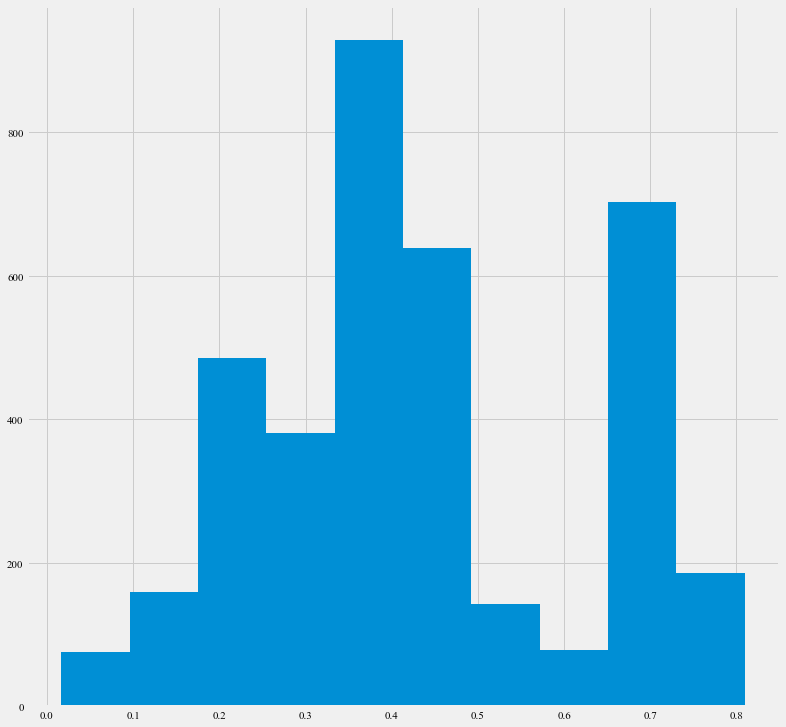

In [4]:
plt.hist(sim.Disposition_binary_sim)

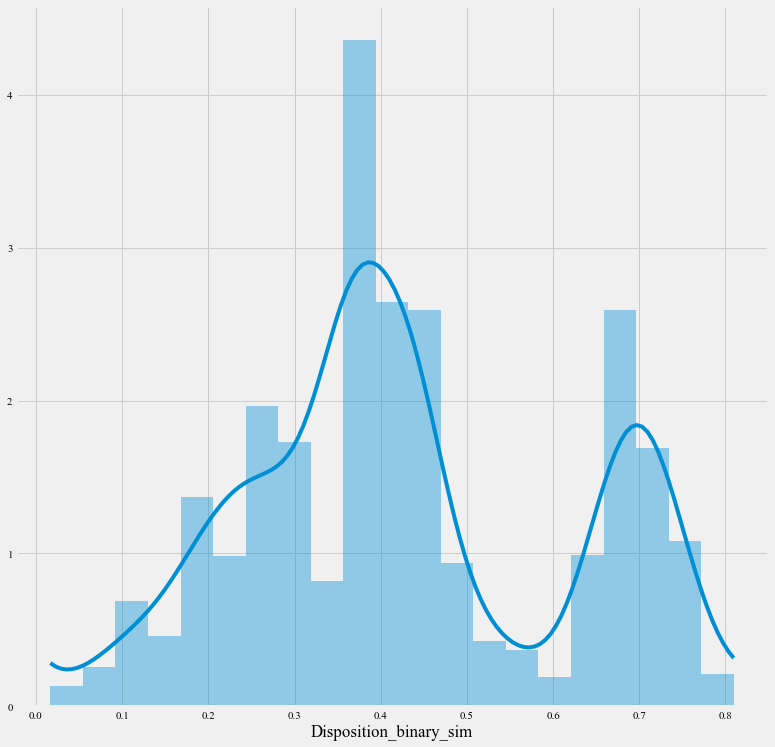

In [5]:
sns.distplot(sim.Disposition_binary_sim, kde_kws={'cut': 0},)

In [6]:
sim['Sex_e'] = sim.Sex_e.str.title()
sim.Sex_e.unique()

array(['Female-Like ', 'Unknown', 'Male'], dtype=object)

In [7]:
sim['Age_e'] = sim.Age_e.str.title()
sim.Age_e.unique()

array(['Adult-Like', 'Nestling'], dtype=object)

In [8]:
sim.G_O.unique()

array(['Non-selasphorus spp.', 'Selasphorus spp.'], dtype=object)

In [9]:
sim['r'] = sim.r.str.title()
sim.r.unique()

array(['Unknown', 'Caught By Domestic Animal', 'Window Hit',
       'Found Inside', 'Found On The Ground', 'Nest Related',
       'Suspect Torpor-Like State'], dtype=object)

In [10]:
sim.r.replace('Nest Related', 'Nest-related', inplace =True)

In [11]:
#sim.Sex_e.replace('unknown', 'female-like', inplace = True)
#sim.Age_e.replace('adult looking bird', 'adult-like bird', inplace = True)

In [12]:
#sim.r.replace('torpor', 'suspect torpor state', inplace = True)
#sim.r.replace('pets', 'domestic animal caught', inplace = True)
#sim.r.replace('inside', 'found inside', inplace = True)
#sim.r.replace('nest', 'nest related', inplace = True)

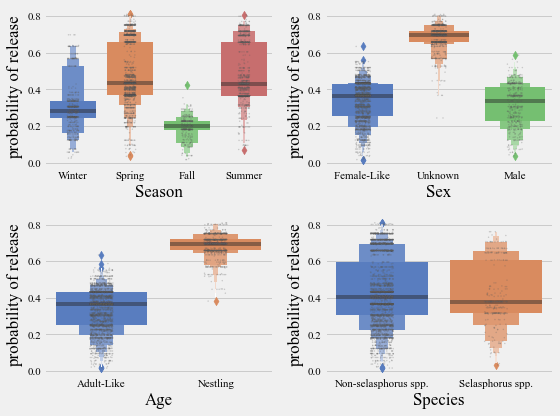

In [13]:
pal = sns.color_palette('muted')
species_c = pal[0]
genus_c= pal[1]
family_c = pal[2]
order_c= pal[3]

f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize = (8, 6), sharex= False)
palette="Blues"
c = '#2b8cbe'
a = 0.2
lw = 0.5
s  =1 
sns.boxenplot(y="Disposition_binary_sim", x= 'season', data= sim, ax= ax1,palette=pal)
sns.stripplot(y="Disposition_binary_sim", x= 'season', data=sim, size=s, jitter=True, color="gray",  alpha  = a, linewidth=lw, ax= ax1)
sns.boxenplot(y=sim["Disposition_binary_sim"], x= sim['Sex_e'], ax= ax2, palette=pal)#palette= palette
sns.stripplot(y="Disposition_binary_sim", x= 'Sex_e', data=sim, size=s, jitter=True, color="gray", alpha  = a, linewidth=lw, ax= ax2)
ax2.set_ylabel('probability of release')
sns.boxenplot(y="Disposition_binary_sim", x= 'Age_e', data= sim, ax= ax3, palette=pal)#palette= palette
sns.stripplot(y="Disposition_binary_sim", x= 'Age_e', data=sim, size=s, jitter=True, color="gray", alpha  = a, linewidth=lw, ax= ax3)
ax3.set_ylabel('probability of release')
sns.boxenplot(y="Disposition_binary_sim", x= 'G_O', data= sim, ax= ax4, palette=pal)#palette= palette
sns.stripplot(y="Disposition_binary_sim", x= 'G_O', data=sim, size=s, jitter=True, color="gray", alpha  = a, linewidth=lw, ax= ax4)

ax4.set_ylabel('probability of release')
ax1.set_ylabel('probability of release')

ax1.set_xlabel('Season')
ax2.set_xlabel('Sex')
ax3.set_xlabel('Age')
ax4.set_xlabel('Species')


#ax1.xaxis.label.set_visible(False)
#ax2.xaxis.label.set_visible(False)
plt.tight_layout()
#plt.savefig('C:/Users/falco/Desktop/directory/Humminbird_rescue/Outputs/Demographic_factors_subset.png', dpi = 600)
plt.show()

In [14]:
sim[sim.Age_e == 'Nestling'].Disposition_binary_sim.value_counts()

0.695728    171
0.658812    106
0.718185     98
0.656905     84
0.716468     70
           ... 
0.714411      1
0.758509      1
0.562630      1
0.381950      1
0.808287      1
Name: Disposition_binary_sim, Length: 83, dtype: int64

In [15]:
sim.columns

Index(['Unnamed: 0', 'Age_e', 'season', 'r', 'Heat', 'Fluids', 'Steroid',
       'NSAID', 'Antibiotic', 'G_O', 'Sex_e', 'predicted_disposition',
       'Disposition_binary_sim'],
      dtype='object')

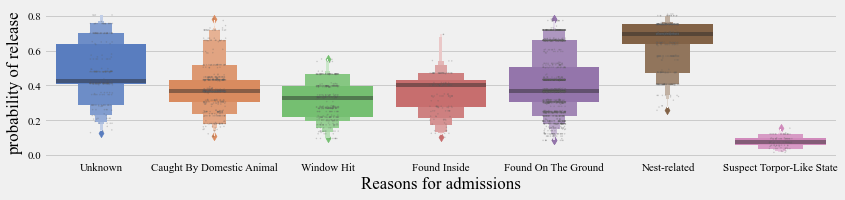

In [16]:
f, (ax1) = plt.subplots( figsize = (12, 3))
palette="Blues"
c = '#2b8cbe'
a = 0.2
lw = 0.5
s  =1 
sns.boxenplot(y="Disposition_binary_sim", x= 'r', data= sim, ax= ax1,palette=pal)
sns.stripplot(y="Disposition_binary_sim", x= 'r', data=sim, size=s, jitter=True, color="gray",  alpha  = a, linewidth=lw, ax= ax1)

ax1.set_ylabel('probability of release')
ax1.set_xlabel('Reasons for admissions')
#ax1.xaxis.label.set_visible(False)
#ax2.xaxis.label.set_visible(False)
plt.tight_layout()
#plt.savefig('C:/Users/falco/Desktop/directory/Humminbird_rescue/Outputs/Reasons_factors.svg', dpi = 600)
plt.show()

In [17]:
sim.Steroid.replace(0, 'No', inplace= True)
sim.Steroid.replace(1, 'Yes', inplace= True)
sim.NSAID.replace(0, 'No', inplace= True)
sim.NSAID.replace(1, 'Yes', inplace= True)
sim.Antibiotic.replace(0, 'No', inplace= True)
sim.Antibiotic.replace(1, 'Yes', inplace= True)
sim.Fluids.replace(0, 'No', inplace= True)
sim.Fluids.replace(1, 'Yes', inplace= True)
sim.Heat.replace(0, 'No', inplace= True)
sim.Heat.replace(1, 'Yes', inplace= True)

In [18]:
#sim.Sex_e.replace('female-like', 'Unknown', inplace = True)
sim['Age_e'] = sim.Age_e.str.title()
sim['G_O'] = sim.G_O.str.title()
sim['Fluids'] = sim.Fluids.str.title()
sim['Steroid'] = sim.Steroid.str.title()
sim['NSAID'] = sim.NSAID.str.title()
sim['Antibiotic'] = sim.Antibiotic.str.title()

In [19]:
sim['G_O'].unique()

array(['Non-Selasphorus Spp.', 'Selasphorus Spp.'], dtype=object)

In [20]:
sim['G_O'].replace('Non-Selasphorus Spp.', 'Non-Selasphorus spp.', inplace = True)
sim['G_O'].replace('Selasphorus Spp.', 'Selasphorus spp.', inplace = True)

In [21]:
sim.Heat.unique()

array(['Yes', 'No'], dtype=object)

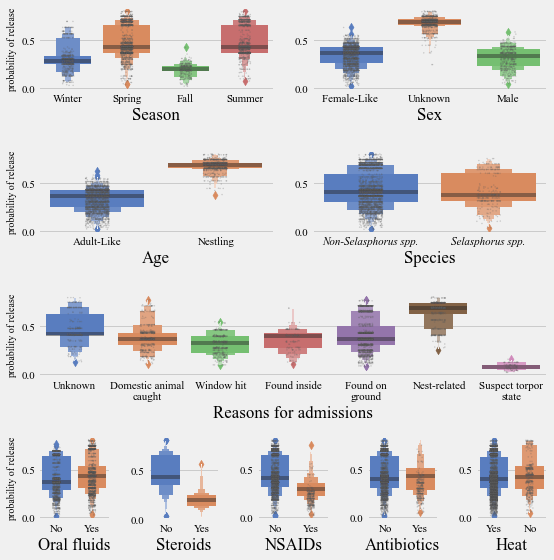

In [25]:
#from matplotlib import rc
# activate latex text rendering
#rc('text', usetex=True)
palette="Blues"
c = '#2b8cbe'
a = 0.2
lw = 0.5
s  =1

fig = plt.subplots(figsize=[8, 8], sharey=True)
#axis name = (rows, cols), (row start, col start)
ax1 = plt.subplot2grid((4, 10), (0, 0), colspan=5, rowspan=1)
ax2 = plt.subplot2grid((4, 10), (0, 5), colspan=5, rowspan=1)
ax3 = plt.subplot2grid((4, 10), (1, 0), colspan=5, rowspan=1)
ax4 = plt.subplot2grid((4, 10), (1, 5), colspan=5, rowspan=1)
ax5 = plt.subplot2grid((4, 10), (2, 0), colspan=10, rowspan=1)

ax6 = plt.subplot2grid((4, 10), (3, 0), colspan=2, rowspan=1)
ax7 = plt.subplot2grid((4, 10), (3, 2), colspan=2, rowspan=1)
ax8 = plt.subplot2grid((4, 10), (3, 4), colspan=2, rowspan=1)
ax9 = plt.subplot2grid((4, 10), (3, 6), colspan=2, rowspan=1)
ax10 = plt.subplot2grid((4, 10), (3, 8), colspan=2, rowspan=1)


 
sns.boxenplot(y="Disposition_binary_sim", x= 'season', data= sim, ax= ax1,palette=pal)
sns.stripplot(y="Disposition_binary_sim", x= 'season', data=sim, size=s, jitter=True, color="gray",  alpha  = a, linewidth=lw, ax= ax1)

sns.boxenplot(y=sim["Disposition_binary_sim"], x= sim['Sex_e'], ax= ax2, palette=pal)#palette= palette
sns.stripplot(y="Disposition_binary_sim", x= 'Sex_e', data=sim, size=s, jitter=True, color="gray", alpha  = a, linewidth=lw, ax= ax2)
ax2.set_ylabel('probability of release')

sns.boxenplot(y="Disposition_binary_sim", x= 'Age_e', data= sim, ax= ax3, palette=pal)#palette= palette
sns.stripplot(y="Disposition_binary_sim", x= 'Age_e', data=sim, size=s, jitter=True, color="gray", alpha  = a, linewidth=lw, ax= ax3)
ax3.set_ylabel('probability of release')

sns.boxenplot(y="Disposition_binary_sim", x= 'G_O', data= sim, ax= ax4, palette=pal)#palette= palette
sns.stripplot(y="Disposition_binary_sim", x= 'G_O', data=sim, size=s, jitter=True, color="gray", alpha  = a, linewidth=lw, ax= ax4)
xlbls = [ "Non-Selasphorus spp.", "Selasphorus spp."]
ax4.set_xticklabels(xlbls, style='italic')


sns.boxenplot(y="Disposition_binary_sim", x= 'r', data= sim, ax= ax5,palette=pal)
sns.stripplot(y="Disposition_binary_sim", x= 'r', data=sim, size=s, jitter=True, color="gray",  alpha  = a, linewidth=lw, ax= ax5)
xlbls = [ 'Unknown', 'Domestic animal\ncaught', 'Window hit','Found inside',
         'Found on\nground', 'Nest-related', 'Suspect torpor\nstate']
ax5.set_xticklabels(xlbls)

sns.boxenplot(y="Disposition_binary_sim", x= 'Fluids', data= sim, ax= ax6,palette=pal)
sns.stripplot(y="Disposition_binary_sim", x= 'Fluids', data=sim, size=s, jitter=True, color="gray",  alpha  = a, linewidth=lw, ax= ax6)

sns.boxenplot(y="Disposition_binary_sim", x= 'Steroid', data= sim, ax= ax7,palette=pal)
sns.stripplot(y="Disposition_binary_sim", x= 'Steroid', data=sim, size=s, jitter=True, color="gray",  alpha  = a, linewidth=lw, ax= ax8)

sns.boxenplot(y="Disposition_binary_sim", x= 'NSAID', data= sim, ax= ax8,palette=pal)
sns.stripplot(y="Disposition_binary_sim", x= 'NSAID', data=sim, size=s, jitter=True, color="gray",  alpha  = a, linewidth=lw, ax= ax9)

sns.boxenplot(y="Disposition_binary_sim", x= 'Antibiotic', data= sim, ax= ax9,palette=pal)
sns.stripplot(y="Disposition_binary_sim", x= 'Antibiotic', data=sim, size=s, jitter=True, color="gray",  alpha  = a, linewidth=lw, ax= ax10)

sns.boxenplot(y="Disposition_binary_sim", x= 'Heat', data= sim, ax= ax10,palette=pal)
sns.stripplot(y="Disposition_binary_sim", x= 'Heat', data=sim, size=s, jitter=True, color="gray",  alpha  = a, linewidth=lw, ax= ax10)


ax1.set_xlabel('Season')
ax2.set_xlabel('Sex')
ax3.set_xlabel('Age')
ax4.set_xlabel('Species')
ax5.set_xlabel('Reasons for admissions')
#ax6.set_xlabel('Fluids')

#ax10.set_xlabel('Antibiotic')

ax1.set_ylabel('probability of release', fontsize = 10)
ax3.set_ylabel('probability of release', fontsize = 10)
ax5.set_ylabel('probability of release', fontsize = 10)
ax6.set_ylabel('probability of release', fontsize = 10)

ax2.set_ylabel('')
ax4.set_ylabel('')
ax7.set_ylabel('')
ax8.set_ylabel('')
ax9.set_ylabel('')
ax10.set_ylabel('')
ax6.set_xlabel('Oral fluids')
ax7.set_xlabel('Steroids')
ax8.set_xlabel('NSAIDs')
ax9.set_xlabel('Antibiotics')

#ax1.xaxis.label.set_visible(False)
#ax2.xaxis.label.set_visible(False)
plt.tight_layout()
plt.savefig('C:/Users/falco/Desktop/directory/Humminbird_rescue/Outputs/Final_figures/Figure6_subset.png', dpi = 600)
plt.savefig('C:/Users/falco/Desktop/directory/Humminbird_rescue/Outputs/Final_figures/Figure6_subset.svg')

plt.show()

In [23]:
sim.groupby(['season']).agg({'Disposition_binary_sim': [np.mean, np.std, 'count']})

Disposition_binary_sim                
                         mean       std count
season                                       
Fall                 0.192133  0.061090   333
Spring               0.484973  0.169120  1763
Summer               0.491107  0.160620  1067
Winter               0.298669  0.132841   616

In [24]:
sim.groupby(['Age_e']).agg({'Disposition_binary_sim': [np.mean, np.std, 'count']})

Disposition_binary_sim                
                             mean       std count
Age_e                                            
Adult-Like               0.334505  0.107843  2753
Nestling                 0.688194  0.056384  1026

In [25]:
sim.groupby(['G_O']).agg({'Disposition_binary_sim': [np.mean, np.std, 'count']})

Disposition_binary_sim                
                                       mean       std count
G_O                                                        
Non-Selasphorus spp.               0.431714  0.185694  3492
Selasphorus spp.                   0.416143  0.170604   287

In [26]:
a = sim.groupby(['r']).agg({'Disposition_binary_sim': [np.mean, np.std, 'count']})
a.columns = ['mean', 'std', 'count']
a.sort_values('mean', ascending = False)

,mean,std,count
r,,,
Nest-related,0.652249,0.117891,575
Unknown,0.475813,0.166241,248
Found On The Ground,0.415774,0.169284,1799
Caught By Domestic Animal,0.386515,0.129947,520
Found Inside,0.357108,0.112973,140
Window Hit,0.312908,0.103599,409
Suspect Torpor-Like State,0.079497,0.032039,88


In [27]:
sim.groupby(['Fluids']).agg({'Disposition_binary_sim': [np.mean, np.std, 'count']})

Disposition_binary_sim                
                         mean       std count
Fluids                                       
No                   0.414774  0.183218  1948
Yes                  0.447296  0.184672  1831

In [28]:
sim.groupby(['Heat']).agg({'Disposition_binary_sim': [np.mean, np.std, 'count']})

Disposition_binary_sim                
                       mean       std count
Heat                                       
No                 0.435682  0.190921   241
Yes                0.430181  0.184202  3538

In [29]:
sim.groupby(['Steroid']).agg({'Disposition_binary_sim': [np.mean, np.std, 'count']})

Disposition_binary_sim                
                          mean       std count
Steroid                                       
No                    0.453882  0.175812  3426
Yes                   0.203909  0.090812   353

In [30]:
sim.groupby(['NSAID']).agg({'Disposition_binary_sim': [np.mean, np.std, 'count']})

Disposition_binary_sim                
                        mean       std count
NSAID                                       
No                   0.44318  0.185328  3432
Yes                  0.30543  0.119544   347

In [31]:
sim.groupby(['Antibiotic']).agg({'Disposition_binary_sim': [np.mean, np.std, 'count']})

Disposition_binary_sim                
                             mean       std count
Antibiotic                                       
No                       0.432587  0.186158  3553
Yes                      0.398219  0.155223   226

## with fluids

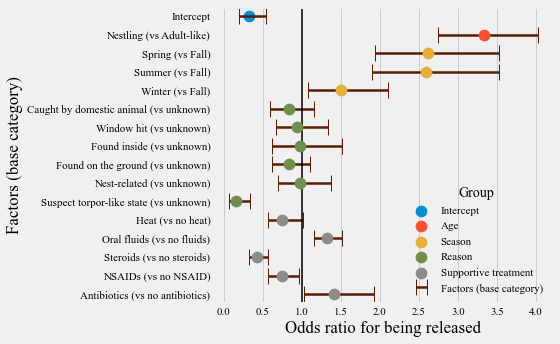

In [35]:
fig, ax = plt.subplots(figsize = [8, 5])
treat = pd.read_csv('C:/Users/falco/Desktop/directory/Humminbird_rescue/Outputs/glmmTMB_Treatment_subset_updated.csv')
treat.replace('Treatment', 'Supportive treatment', inplace = True)
#treat.replace('First aid (vs no)', 'Supportive treatment (vs no)', inplace = True)
#treat.replace('Sugar water (vs. no)', 'Commercial nektar plus solution (vs. no)', inplace= True)
#treat.replace('Dexamethazone (vs. no)', 'Steroid: Dexamethanzone (vs. no)', inplace= True)
#treat.replace('Antibiotic (vs. no)', 'Antibiotic: Enrofloxacin (vs. no)', inplace= True)
#treat.replace('Meloxicam (vs. no)', 'NSAID: Meloxicam (vs. no)', inplace= True)
treat['UL_plot'] =  treat.UL- treat.Est
treat['LL_plot'] =  treat.Est -treat.LL
ax.errorbar(data=treat, x='Est', y='Factors (base category)', 
            xerr=(list(treat['LL_plot'].values),list(treat['UL_plot'].values)),yerr = None, ls='none', 
           ecolor='#5c1c04', elinewidth=2.5, capsize=8, barsabove=True,)
sns.pointplot(data=treat, x='Est', y='Factors (base category)', join=False, ax = ax, hue='Group', scale=0.5,)
ax.set_xlabel('Odds ratio for being released')
ax.axvline(1, lw = 1.5, color = 'black')
#ax.set_xscale('symlog')
plt.tight_layout()
plt.savefig('C:/Users/falco/Desktop/directory/Humminbird_rescue/Outputs/Final_figures/Figure4_subset.svg')
plt.savefig('C:/Users/falco/Desktop/directory/Humminbird_rescue/Outputs/Final_figures/Figure4_subset.png', dpi = 600)

plt.show()

In [36]:
m1 = pd.read_csv('C:/Users/falco/Desktop/directory/Humminbird_rescue/Outputs/glmmTMB_speciesRaEF_updated.csv')
m1.replace('First Aid', 'Supportive treatment', inplace = True)
m1.replace('First aid (vs no)', 'Supportive treatment (vs no)', inplace = True)

In [37]:
m1

,Group,Factors (base category),Est,LL,UL
0,Intercept,Intercept,0.20,0.14,0.28
1,Age,Nestling (vs Adult-like),0.85,0.10,7.13
2,Season,Spring (vs Fall),2.73,2.12,3.52
3,Season,Summer (vs Fall),2.75,2.11,3.57
4,Season,Winter (vs Fall),1.56,1.17,2.09
5,Supportive treatment,Supportive treatment (vs no),0.90,0.80,1.01
6,Reason,Caught by domestic animal (vs unknown),0.65,0.53,0.79
7,Reason,Window hit (vs unknown),0.65,0.52,0.82
8,Reason,Found inside (vs unknown),0.86,0.62,1.19
9,Reason,Found on the ground (vs unknown),0.76,0.65,0.89


m1['Factors (base category)'] = [
    'Intercept', 
    'Female-like (vs Unknown)',
    'Male (vs Unknown)',
    'Spring (vs Fall)',
    'Summer (vs Fall)',
    'Winter (vs Fall)', 
    'First aid (vs No)',
    'Caught by domestic animals (vs unknown)',
    'Window hit (vs unknown)',
    'Found inside (vs unknown)', 
    'Found on the ground (vs unknown)',
    'Nest-related (vs unknown)',
    'Torpor state (vs unknown)', 
    'Female-Spring',
    'Male-Spring',
    'Female-Summer',
    'Male-Summer',
    'Female-Winter',
    'Male-Winter',

]

m1['Group'] = ['Intercept', 'Sex', 'Sex', 'Season', 'Season','Season','First aid',
               'Reason', 'Reason', 'Reason', 'Reason', 'Reason', 'Reason', 'Sex*Season', 'Sex*Season', 'Sex*Season', 'Sex*Season', 'Sex*Season', 'Sex*Season']

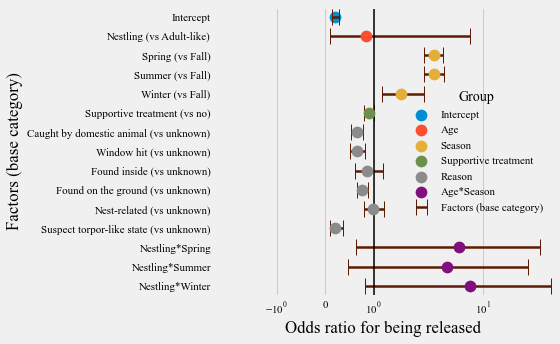

In [38]:
fig, ax = plt.subplots(figsize = [8, 5])

m1['UL_plot'] =  m1.UL- m1.Est
m1['LL_plot'] =  m1.Est -m1.LL
ax.errorbar(data=m1, x='Est', y='Factors (base category)', 
            xerr=(list(m1['LL_plot'].values),list(m1['UL_plot'].values)),yerr = None, ls='none', 
           ecolor='#5c1c04', elinewidth=2.5, capsize=8, barsabove=True,)
sns.pointplot(data=m1, x='Est', y='Factors (base category)', join=False, ax = ax, hue='Group', scale=0.5,)
ax.set_xlabel('Odds ratio for being released')
ax.axvline(1, lw = 1.5, color = 'black')
ax.set_xscale('symlog')
plt.tight_layout()
plt.savefig('C:/Users/falco/Desktop/directory/Humminbird_rescue/Outputs/Final_figures/model1.svg')
plt.savefig('C:/Users/falco/Desktop/directory/Humminbird_rescue/Outputs/Final_figures/model1.png', dpi = 600)

plt.show()

In [36]:
#m1.Group.replace('First Aid', 'Treatment', inplace = True)
m1

,Group,Factors (base category),Est,LL,UL,UL_plot,LL_plot
0,Intercept,Intercept,0.20,0.14,0.28,0.08,0.06
1,Age,Nestling (vs Adult-like),0.85,0.10,7.13,6.28,0.75
2,Season,Spring (vs Fall),2.73,2.12,3.52,0.79,0.61
3,Season,Summer (vs Fall),2.75,2.11,3.57,0.82,0.64
4,Season,Winter (vs Fall),1.56,1.17,2.09,0.53,0.39
5,Supportive treatment,Supportive treatment (vs no),0.90,0.80,1.01,0.11,0.10
6,Reason,Caught by domestic animal (vs unknown),0.65,0.53,0.79,0.14,0.12
7,Reason,Window hit (vs unknown),0.65,0.52,0.82,0.17,0.13
8,Reason,Found inside (vs unknown),0.86,0.62,1.19,0.33,0.24
9,Reason,Found on the ground (vs unknown),0.76,0.65,0.89,0.13,0.11


In [37]:
treat

,Group,Factors (base category) old,Factors (base category),Est,LL,UL,UL_plot,LL_plot
0,Intercept,Intercept,Intercept,0.32,0.19,0.54,0.22,0.13
1,Age,Nestling (vs Adult-like),Nestling (vs Adult-like),3.33,2.75,4.02,0.69,0.58
2,Season,Spring (vs Fall),Spring (vs Fall),2.61,1.94,3.53,0.92,0.67
3,Season,Summer (vs Fall),Summer (vs Fall),2.59,1.90,3.53,0.94,0.69
4,Season,Winter (vs Fall),Winter (vs Fall),1.50,1.08,2.10,0.60,0.42
5,Reason,Caught by domestic animal (vs unknown),Caught by domestic animal (vs unknown),0.83,0.59,1.15,0.32,0.24
6,Reason,Window hit (vs unknown),Window hit (vs unknown),0.94,0.67,1.34,0.40,0.27
7,Reason,Found inside (vs unknown),Found inside (vs unknown),0.97,0.62,1.51,0.54,0.35
8,Reason,Found on the ground (vs unknown),Found on the ground (vs unknown),0.83,0.62,1.11,0.28,0.21
9,Reason,Nest-related (vs unknown),Nest-related (vs unknown),0.98,0.70,1.37,0.39,0.28


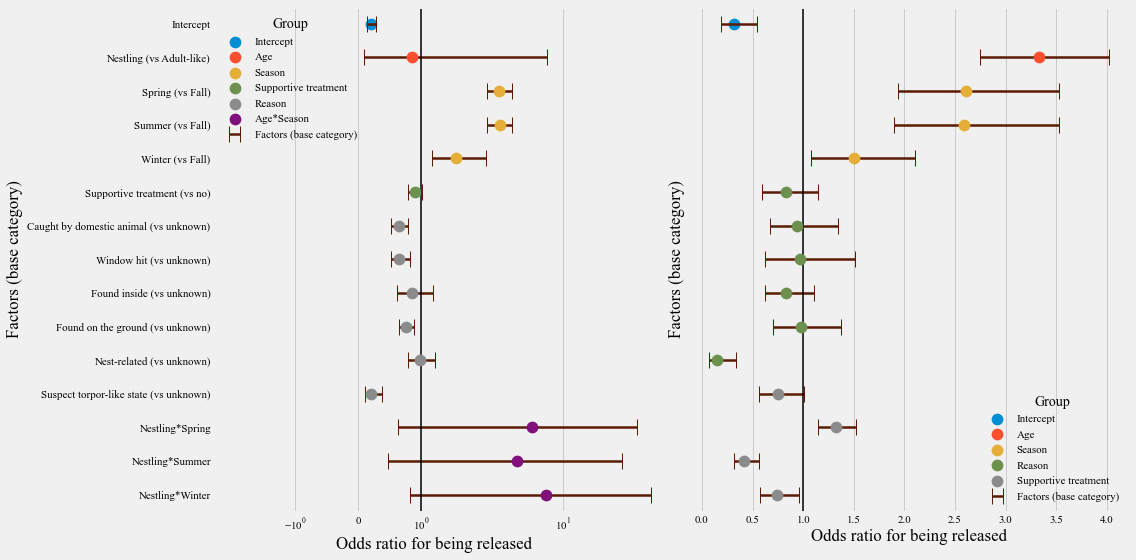

In [38]:
fig, (ax2, ax1) = plt.subplots(1, 2, figsize = [16, 8], sharey = True)
treat.replace('First Aid', 'Supportive treatment')
treat.replace('First aid (vs no)', 'Supportive treatment (vs no)')
treat['UL_plot'] =  treat.UL- treat.Est
treat['LL_plot'] =  treat.Est -treat.LL
ax1.errorbar(data=treat, x='Est', y='Factors (base category)', 
            xerr=(list(treat['LL_plot'].values),list(treat['UL_plot'].values)),yerr = None, ls='none', 
           ecolor='#5c1c04', elinewidth=2.5, capsize=8, barsabove=True,)
sns.pointplot(data=treat, x='Est', y='Factors (base category)', join=False, ax = ax1, hue='Group', scale=0.5,)
ax1.set_xlabel('Odds ratio for being released')
ax1.axvline(1, lw = 1.5, color = 'black')
#ax.set_xscale('symlog')


m1['UL_plot'] =  m1.UL- m1.Est
m1['LL_plot'] =  m1.Est -m1.LL
ax2.errorbar(data=m1, x='Est', y='Factors (base category)', 
            xerr=(list(m1['LL_plot'].values),list(m1['UL_plot'].values)),yerr = None, ls='none', 
           ecolor='#5c1c04', elinewidth=2.5, capsize=8, barsabove=True,)
sns.pointplot(data=m1, x='Est', y='Factors (base category)', join=False, ax = ax2, hue='Group', scale=0.5,)
ax2.set_xlabel('Odds ratio for being released')
ax2.axvline(1, lw = 1.5, color = 'black')
ax2.set_xscale('symlog')
plt.tight_layout()
#plt.savefig('C:/Users/falco/Desktop/directory/Humminbird_rescue/Outputs/Final_figures/model1.svg')
#plt.savefig('C:/Users/falco/Desktop/directory/Humminbird_rescue/Outputs/Final_figures/model1.png', dpi = 600)

plt.show()